# xG Model based on Distance and angles

This is a simple xG model based on disance and angle of shot using statsbomb open data samples.

In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
%matplotlib inline
import os
import math

## Extracting and cleaning the data

In [2]:
directory = "C:\\Users\\marwane\\Documents\\Data_Science\\Football\\Statsbomb\\Open_events\\open-data-master\\data\\events"
all_srcs = []
c = 0
for f in os.listdir(directory):
    
    #Taking all the events that code is in the 9000s
    #if int(f[:-5]) >=9000 and  int(f[:-5]) <= 9999:
    all_srcs.append(os.path.join(directory,f))
    c += 1
    print(f)

#print("# ",c)

15946.json
15956.json
15973.json
15978.json
15986.json
15998.json
16010.json
16023.json
16029.json
16056.json
16073.json
16079.json
16086.json
16095.json
16109.json
16120.json
16131.json
16136.json
16149.json
16157.json
16173.json
16182.json
16190.json
16196.json
16205.json
16215.json
16231.json
16240.json
16248.json
16265.json
16275.json
16289.json
16306.json
16317.json
18235.json
18236.json
18237.json
18240.json
18241.json
18242.json
18243.json
18244.json
18245.json
19714.json
19715.json
19716.json
19717.json
19718.json
19719.json
19720.json
19722.json
19723.json
19724.json
19725.json
19726.json
19727.json
19728.json
19729.json
19730.json
19731.json
19732.json
19733.json
19734.json
19735.json
19736.json
19737.json
19738.json
19739.json
19740.json
19741.json
19742.json
19743.json
19744.json
19745.json
19746.json
19747.json
19748.json
19749.json
19750.json
19751.json
19752.json
19753.json
19754.json
19755.json
19756.json
19757.json
19758.json
19759.json
19760.json
19761.json
19762.json

In [3]:
# function to compute the distance of a point toward each goal post
def goal_post_dist(a,b):
    d1 = math.sqrt((a-120)**2 + (b-36)**2)
    d2 = math.sqrt((a-120)**2 + (b-44)**2)
    
    return d1,d2    

In [4]:
def center_goal_post_dist(a,b):
    d = round(math.sqrt((a-120)**2 + (b-40)**2),2)
    return d

In [5]:
# find the angle of a triangle 
def cosines_law(a,b,c):
    cosalpha = (-c**2+a**2+b**2)/(2*a*b)
    return math.degrees(np.arccos(cosalpha))

In [6]:
# Create a dataframe containing essential data to further treat and compute
def shots(event):
    x = []
    y = []
    team =  []
    player =  []
    outcome =  []
    xEnd = []
    yEnd = []
    angles = []
    distances = []
    
    
    for i in event:
        if 'shot' in i:            
            x.append(i['location'][0])
            y.append(i['location'][1])
            team.append(i['team']['name'])
            player.append(i['player']['name'])
            
            ## get the elements from the shot event
            # if the outcome is a goal than we register "1". If its anything else, then its "0"
            if i['shot']['outcome']['name'] =="Goal":
                outcome.append(1)
            else:
                outcome.append(0)
                
            ## Find the shot angles
            a,b = goal_post_dist(i['location'][0],i['location'][1])
            angles.append(round(cosines_law(a,b,44-36),2))
            
            ## Find the distance of the player to the center of goal line
            distances.append(center_goal_post_dist(i['location'][0],i['location'][1]))
            
            
            
            
    data = {'team':team,'player':player,'x':x,'y':y,'goal':outcome,'angle':angles,'distance':distances}            
    df = pd.DataFrame(data) 
    
    #
    
    
    
            
    return df      

In [7]:
#shots(events)

In [8]:
# Apply  the function on all the files
all_events = []

for i in all_srcs:
    with open(i,encoding="utf-8") as data:
        all_events.append(shots(json.load(data)))


<ipython-input-5-12f840932633>:4: RuntimeWarning: invalid value encountered in arccos
  return math.degrees(np.arccos(cosalpha))


In [9]:
df =  pd.concat(all_events)

In [10]:
df.head()

,team,player,x,y,goal,angle,distance
0,Barcelona,Lionel Andrés Messi Cuccittini,111.7,51.7,0,19.28,14.35
1,Barcelona,Jordi Alba Ramos,114.0,27.0,0,14.25,14.32
2,Barcelona,Lionel Andrés Messi Cuccittini,92.0,34.5,0,15.67,28.54
3,Deportivo Alavés,Rubén Sobrino Pozuelo,109.1,38.7,0,39.84,10.98
4,Barcelona,Luis Alberto Suárez Díaz,107.0,25.0,0,15.38,19.85


In [11]:
# reset the indexes
df.reset_index(drop=True,inplace=True)
df.head()

,team,player,x,y,goal,angle,distance
0,Barcelona,Lionel Andrés Messi Cuccittini,111.7,51.7,0,19.28,14.35
1,Barcelona,Jordi Alba Ramos,114.0,27.0,0,14.25,14.32
2,Barcelona,Lionel Andrés Messi Cuccittini,92.0,34.5,0,15.67,28.54
3,Deportivo Alavés,Rubén Sobrino Pozuelo,109.1,38.7,0,39.84,10.98
4,Barcelona,Luis Alberto Suárez Díaz,107.0,25.0,0,15.38,19.85


Cleaning the Data and taking out the Null values

In [12]:
# Check there are any null values
df.isnull().values.any()

True

In [13]:
df.isnull().sum()

team        0
player      0
x           0
y           0
goal        0
angle       3
distance    0
dtype: int64

In [14]:
df.dropna(inplace=True)

In [15]:
df.head()

,team,player,x,y,goal,angle,distance
0,Barcelona,Lionel Andrés Messi Cuccittini,111.7,51.7,0,19.28,14.35
1,Barcelona,Jordi Alba Ramos,114.0,27.0,0,14.25,14.32
2,Barcelona,Lionel Andrés Messi Cuccittini,92.0,34.5,0,15.67,28.54
3,Deportivo Alavés,Rubén Sobrino Pozuelo,109.1,38.7,0,39.84,10.98
4,Barcelona,Luis Alberto Suárez Díaz,107.0,25.0,0,15.38,19.85


### Shot Heatmap

Heatmap of all the shots taken through all the matches recorded

In [16]:
from mplsoccer import Pitch
import seaborn as sns

Text(0.5, 1.0, 'Shot Heat map ')

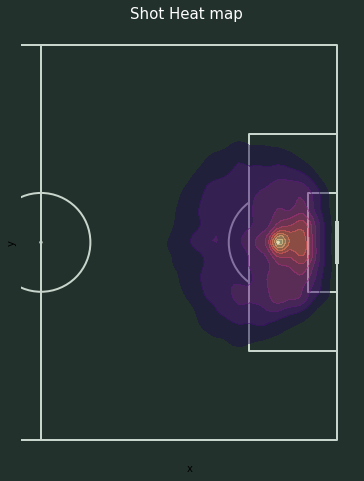

In [17]:
fig ,ax = plt.subplots(figsize=(13.5,8))
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')

pitch = Pitch(pitch_type='statsbomb', orientation='horizontal',
              pitch_color='#22312b', line_color='#c7d5cc', figsize=(13, 8),
              constrained_layout=False, tight_layout=True,half=True)

pitch.draw(ax=ax)
plt.gca().invert_yaxis()

kde = sns.kdeplot(
        df['x'],
        df['y'],
        shade = True,
        shade_lowest=False,
        alpha=.5,
        n_levels=10,
        cmap = 'magma'
)

plt.title('Shot Heat map ',color='white',size=15)

### Shot Leading to goal Heat map

Heatmap of the successful shots leading to a goal

In [18]:
goal_df = df[['goal','x','y']]
goal_df = goal_df.loc[goal_df['goal']==1]
goal_df

,goal,x,y
19,1,96.1,45.1
25,1,105.1,31.1
27,1,112.0,34.6
39,1,112.7,48.6
46,1,116.9,37.3
...,...,...,...
27980,1,115.2,33.1
27984,1,109.8,40.6
27995,1,116.8,36.2
27999,1,102.4,37.6


Text(0.5, 1.0, 'Shot leading to a goal Heat map ')

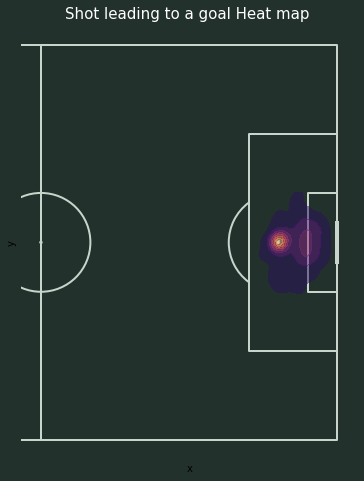

In [19]:
fig ,ax = plt.subplots(figsize=(26,8))
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')

pitch = Pitch(pitch_type='statsbomb', orientation='horizontal',
              pitch_color='#22312b', line_color='#c7d5cc', figsize=(13, 8),
              constrained_layout=False, tight_layout=True,half=True)

pitch.draw(ax=ax)
plt.gca().invert_yaxis()

kde = sns.kdeplot(
        goal_df['x'],
        goal_df['y'],
        shade = True,
        shade_lowest=False,
        alpha=.5,
        n_levels=10,
        cmap = 'magma'
)

plt.title('Shot leading to a goal Heat map ',color='white',size=15)

### Plotting the probability of scoring a goal based on the Distance and on the Angle

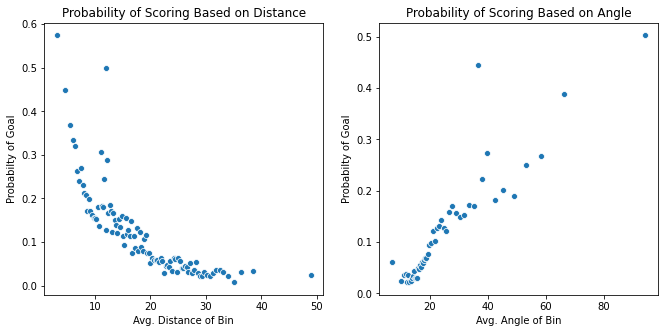

In [20]:
fig, axes = plt.subplots(1,2,figsize=(11, 5))

df['goal'] = df['goal'].astype(int)
df['Distance_bins'] = pd.qcut(df['distance'],q=100)


goal_prob = df.groupby(by='Distance_bins',as_index=False)['goal'].mean()['goal']
dist_mean = df.groupby(by='Distance_bins',as_index=False)['distance'].mean()['distance']

dist_trend = sns.scatterplot(x=dist_mean,y=goal_prob,ax=axes[0])
dist_trend.set(xlabel="Avg. Distance of Bin",
       ylabel="Probabilty of Goal",
       title="Probability of Scoring Based on Distance")

df['Angle_Bins'] = pd.qcut(df['angle'],q=50)
angle_prob = df.groupby('Angle_Bins',as_index=False)['goal'].mean()['goal']
angle_mean = df.groupby('Angle_Bins',as_index=False)['angle'].mean()['angle']
angle_trend = sns.scatterplot(x=angle_mean,y=angle_prob,ax=axes[1])
angle_trend.set(xlabel="Avg. Angle of Bin",
       ylabel="Probabilty of Goal",
       title="Probability of Scoring Based on Angle")



plt.show()

## Modelization of Goals depending on the distance

### Plot the distribution of all the goals (or not) depending on the distance

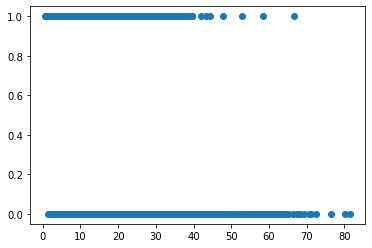

In [21]:
plt.scatter(df['distance'],df['goal'])

define X and y for our dataset

In [22]:
X = np.asarray(df[['distance']])
y = np.asarray(df['goal'])

Setting the Training and Testing sets

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=4)
print('Train set : ',X_train.shape, y_train.shape)
print('Test set : ',X_test.shape,y_test.shape)

Train set :  (22417, 1) (22417,)
Test set :  (5605, 1) (5605,)


### Using Logistic Regression

Goals being a matter of 0 or 1 probablitiy, it seems more adequate to fit a Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

LR = LogisticRegression()
LR.fit(X_train,y_train)
coef = LR.coef_[0]
intercept = LR.intercept_

In [25]:
print(coef)
print(intercept)

[-0.1188869]
[-0.06542665]


### Fitting a Logistic Regression

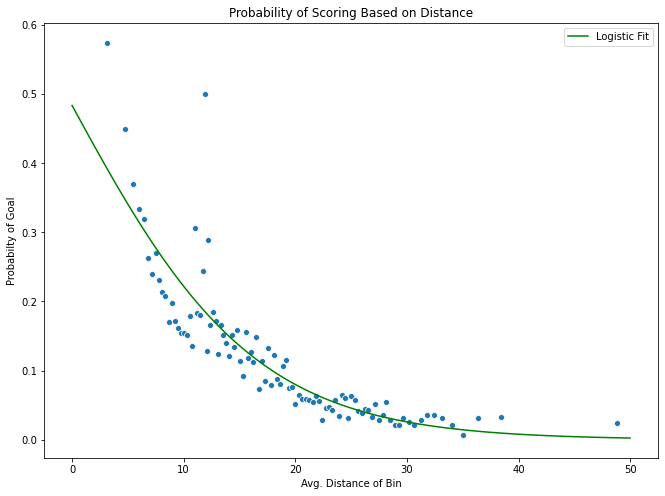

In [26]:
fig, axes = plt.subplots(figsize=(11, 8))

df['goal'] = df['goal'].astype(int)
df['Distance_bins'] = pd.qcut(df['distance'],q=100)


goal_prob = df.groupby(by='Distance_bins',as_index=False)['goal'].mean()['goal']
dist_mean = df.groupby(by='Distance_bins',as_index=False)['distance'].mean()['distance']

dist_trend = sns.scatterplot(x=dist_mean,y=goal_prob,ax=axes)
dist_trend.set(xlabel="Avg. Distance of Bin",
       ylabel="Probabilty of Goal",
       title="Probability of Scoring Based on Distance")

dis = np.linspace(0,50,100)

sns.lineplot(x=dis,y=1/(1+np.exp((-coef)*dis - intercept)),color='green',legend='full',label='Logistic Fit')



plt.show()

## Polynomial Logistic Regression

The fitting of the line seems pretty fine. But we know we can do better. we use curve_fit witha standard sigmoid function to fit the line following the degrees.

In [27]:
import pylab
from scipy.optimize import curve_fit

In [28]:
#+c*x**2+d*x**3+e*x**4+f*x**5+g*x**6+h*x**7+i*x**8
def sigmoid(x, a, b, c, d,e,f,g,h,i):
    y=1/(1+np.exp(-a+b*x))
    return (y)

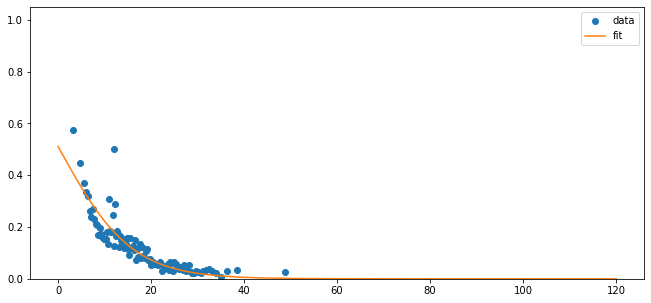

In [29]:
fig, axes = plt.subplots(figsize=(11, 5))

df['goal'] = df['goal'].astype(int)
df['Distance_bins'] = pd.qcut(df['distance'],q=100)


goal_prob = df.groupby(by='Distance_bins',as_index=False)['goal'].mean()['goal']
dist_mean = df.groupby(by='Distance_bins',as_index=False)['distance'].mean()['distance']

""" """
popt,pcov = curve_fit(sigmoid,dist_mean,goal_prob)

x = np.linspace(0, 120, 100)
y = sigmoid(x,*popt)

pylab.plot(dist_mean,goal_prob, 'o', label='data')
pylab.plot(x,y, label='fit')
pylab.ylim(0, 1.05)
pylab.legend(loc='best')
pylab.show()
plt.show()

The series of different degrees used are not convincing with the standard sigmoid. Let's try to be more precise by choosing more pertinent coefficients.  
We use sklearn to try fitting the line with the PolynomialFeatures function.  
We use a Polynomial Logistic Regression of degree 2.

In [30]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

poly = PolynomialFeatures(degree = 2, interaction_only=False, include_bias=False)
LR2 = LogisticRegression()
LR2.fit(X_train,y_train)
pipe = Pipeline([('polynomial_features',poly), ('logistic_regression',LR2)])
pipe.fit(X_train,y_train)



print(LR2.coef_,LR2.intercept_)
coef1=LR2.coef_[0][0]
coef2=LR2.coef_[0][1]

print(coef1, coef2)


[[-0.1799747   0.00180553]] [0.35110339]
-0.1799746954953171 0.0018055303947245936


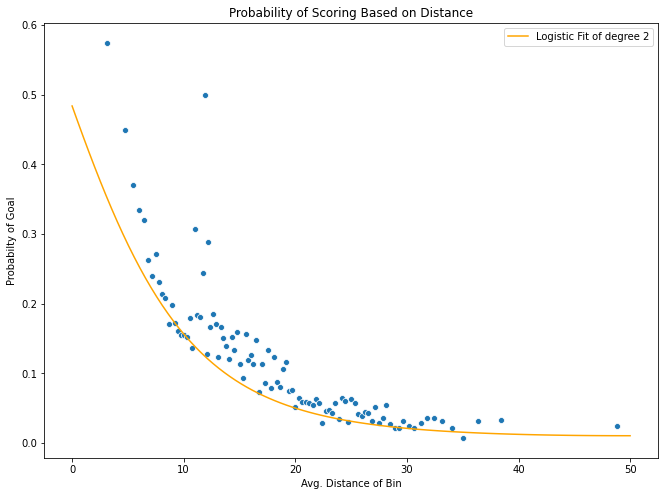

In [31]:
fig, axes = plt.subplots(figsize=(11, 8))

df['goal'] = df['goal'].astype(int)
df['Distance_bins'] = pd.qcut(df['distance'],q=100)


goal_prob = df.groupby(by='Distance_bins',as_index=False)['goal'].mean()['goal']
dist_mean = df.groupby(by='Distance_bins',as_index=False)['distance'].mean()['distance']

dist_trend = sns.scatterplot(x=dist_mean,y=goal_prob,ax=axes)
dist_trend.set(xlabel="Avg. Distance of Bin",
       ylabel="Probabilty of Goal",
       title="Probability of Scoring Based on Distance")

dis = np.linspace(0,50,100)

sns.lineplot(x=dis,y=1/(1+np.exp((-coef1)*dis - (coef2)*dis**2 - intercept)),color='orange',legend='full',label='Logistic Fit of degree 2')




The result is pretty much similar, but adding more degrees give a better fit to the line.  
Here the case with a degree 3.

[[-1.23147267e-01 -4.71691406e-04  2.33907068e-05]]
Intercept :  [-0.01841818]
-0.12314726694184915 -0.00047169140637395087 2.3390706787787447e-05


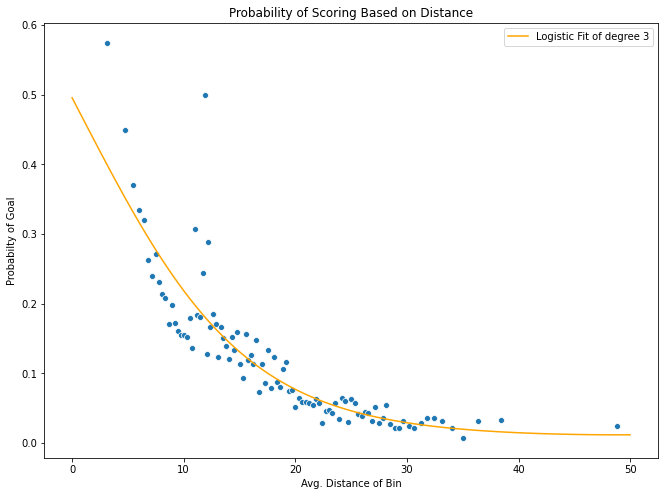

In [34]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

poly = PolynomialFeatures(degree = 3, interaction_only=False, include_bias=False)
LR3 = LogisticRegression()
LR3.fit(X_train,y_train)
pipe = Pipeline([('polynomial_features',poly), ('logistic_regression',LR3)])
pipe.fit(X_train,y_train)

print(LR3.coef_)
print("Intercept : ",LR3.intercept_)
coef1=LR3.coef_[0][0]
coef2=LR3.coef_[0][1]
coef3=LR3.coef_[0][2]

print(coef1, coef2, coef3)

# Plotting the line fitting
fig, axes = plt.subplots(figsize=(11, 8))

df['goal'] = df['goal'].astype(int)
df['Distance_bins'] = pd.qcut(df['distance'],q=100)


goal_prob = df.groupby(by='Distance_bins',as_index=False)['goal'].mean()['goal']
dist_mean = df.groupby(by='Distance_bins',as_index=False)['distance'].mean()['distance']

dist_trend = sns.scatterplot(x=dist_mean,y=goal_prob,ax=axes)
dist_trend.set(xlabel="Avg. Distance of Bin",
       ylabel="Probabilty of Goal",
       title="Probability of Scoring Based on Distance")

dis = np.linspace(0,50,100)

sns.lineplot(x=dis,y=1/(1+np.exp((-coef1)*dis - (coef2)*dis**2 - (coef3)*dis**3 - LR3.intercept_)),color='orange',legend='full',label='Logistic Fit of degree 3')




All the Polynomial equations with a degree superior to 3 tend to make less sens. So we suppose that 3 is the degree at which we have the best fit for this method.

## Modelization of Goals depending on the angles

In [35]:
X = np.asarray(df[['angle']])
y = np.asarray(df['goal'])


X_train2, X_test2, y_train2, y_test2 = train_test_split(X,y,test_size=.2,random_state=10)
print('Train set : ',X_train2.shape, y_train2.shape)
print('Test set : ',X_test2.shape,y_test2.shape)

Train set :  (22417, 1) (22417,)
Test set :  (5605, 1) (5605,)


In [36]:
poly = PolynomialFeatures(degree = 2, interaction_only=False, include_bias=False)
LR4 = LogisticRegression()
LR4.fit(X_train2,y_train2)
pipe = Pipeline([('polynomial_features',poly), ('logistic_regression',LR4)])
pipe.fit(X_train2,y_train2)

print(LR4.coef_,LR4.intercept_)

[[ 0.07204555 -0.00032383]] [-3.71914783]


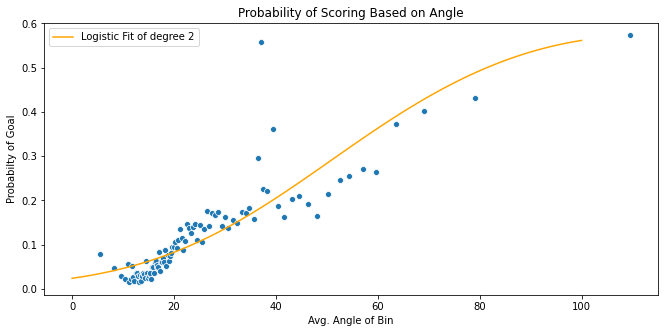

In [37]:
fig, axes = plt.subplots(figsize=(11, 5))

df['Angle_Bins'] = pd.qcut(df['angle'],q=100)

angle_prob = df.groupby('Angle_Bins',as_index=False)['goal'].mean()['goal']
angle_mean = df.groupby('Angle_Bins',as_index=False)['angle'].mean()['angle']
angle_trend = sns.scatterplot(x=angle_mean,y=angle_prob)
angle_trend.set(xlabel="Avg. Angle of Bin",
       ylabel="Probabilty of Goal",
       title="Probability of Scoring Based on Angle")
ang = np.linspace(0,100,100)

sns.lineplot(x=ang,y=1/(1+np.exp((-LR4.coef_[0][0])*ang - (LR4.coef_[0][1])*ang**2  - LR4.intercept_)),color='orange',legend='full',label='Logistic Fit of degree 2')



plt.show()

After trials, we realize that the best fit for the angles model is a polynomial logistic regression of degree 2

This a very simple model that can be extended by adding many more parameters (body parts, defenders coverage, dominant foot, type of pass leading to a shot ...) we can elaborate a more precise xG model that can answer very specific problematics.